## Analysis of U.S. Refugee Data

The refugee data in this notebook comes from the [Department of State's Refugee Processing Center](https://www.wrapsnet.org/)'s [data portal](http://www.wrapsnet.org/Reports/InteractiveReporting/tabid/393/Default.aspx). It was retrieved on November 18, 2015.

## Load the data

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sb
import itertools
%matplotlib inline

In [2]:
by_destination = pd.read_csv("../data/WRAPS-arrivals-by-destination-2005-2015-clean.csv")
by_religion = pd.read_csv("../data/WRAPS-arrivals-by-religion-2005-2015-clean.csv")

In [3]:
# The totals for the two data-reports are off by just four arrivals.
print(by_destination["arrivals"].sum())
print(by_religion["arrivals"].sum())

672518
672522


In [4]:
state_populations = pd.read_csv("../data/census-state-populations.csv").set_index("state")

In [5]:
territories = [ "Guam", "Puerto Rico" ]

In [6]:
colors = itertools.cycle([ "#3498db","#2ecc71", "#9b59b6" ])

## Set up a few data-processing and chart-making functions

In [7]:
def arrivals_by_year(origin=None, dest_state=None, dest_city=None):
    return by_destination[
        (by_destination["origin"] == (origin if origin else by_destination["origin"])) &
        (by_destination["dest_state"] == (dest_state if dest_state else by_destination["dest_state"])) &
        (by_destination["dest_city"] == (dest_city if dest_city else by_destination["dest_city"]))
    ].groupby("year")["arrivals"].sum()

In [8]:
def make_vbar(series, title):
    ax = series.plot(kind="bar", width=0.85,
        figsize=(10, 6),
        fontsize=14,
        color=next(colors))
    ax.figure.set_facecolor("white")
    ax.set_ylim(0, series.max() * 1.05)
    ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ])
    mpl.pyplot.setp(ax.get_children()[len(series) + 1], alpha=0.5)
    mpl.pyplot.setp(ax.get_xticklabels(), rotation=0)
    ax.set_xlabel("")
    ax.set_title(title, fontsize=16, fontweight="bold", alpha=0.75)
    return ax

In [9]:
def make_hbar(series, title, width=9, height=20):
    ax = series.plot(kind="barh", width=0.75,
        figsize=(width, height),
        fontsize=14,
        color=next(colors))
    ax.figure.set_facecolor("white")
    ax.set_xlim(0, series.max() * 1.05)
    ax.set_xticklabels([ "{0:,.0f}".format(x) for x in ax.get_xticks() ])
    ax.invert_yaxis()
    ax.set_ylabel("")
    ax.set_title(title, fontsize=16, fontweight="bold", alpha=0.75)
    return ax

## Refugee arrivals by year

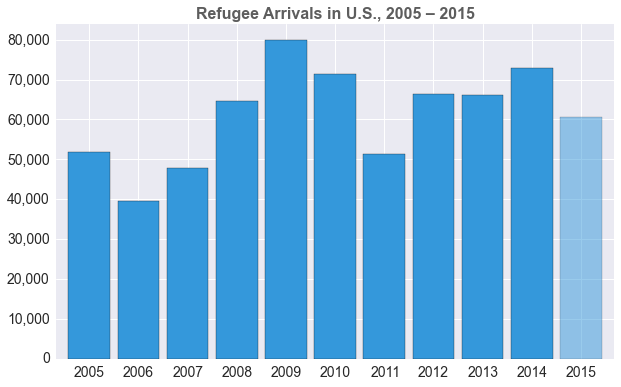

In [10]:
ax = make_vbar(arrivals_by_year(), "Refugee Arrivals in U.S., 2005 – 2015")
pass

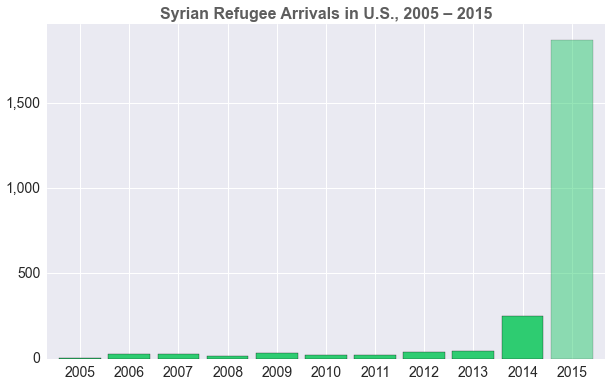

In [11]:
ax = make_vbar(arrivals_by_year(origin="Syria"), "Syrian Refugee Arrivals in U.S., 2005 – 2015")
pass

## Refugee arrivals by origin

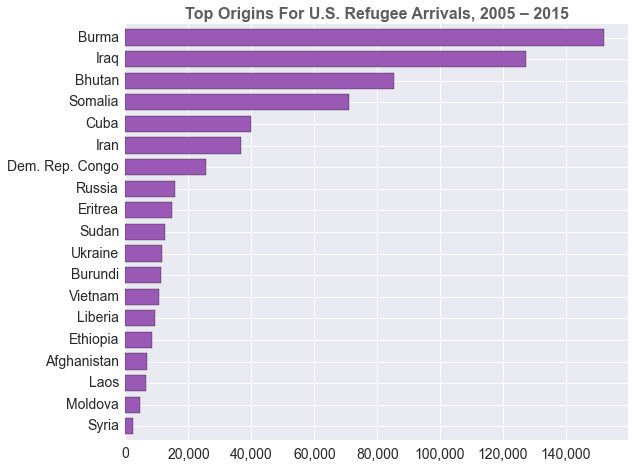

In [12]:
origin_counts = by_destination.groupby("origin")["arrivals"].sum()
ax = make_hbar(origin_counts.sort_values(ascending=False).head(19),
    "Top Origins For U.S. Refugee Arrivals, 2005 – 2015",
    height=(20 * 19 / 51))
pass

## Refugee arrivals by religion

In [13]:
by_religion.groupby("religion")["arrivals"].sum().sort_values(ascending=False)

religion
Christian                166421
Moslem                   117270
Moslem Suni               56752
Hindu                     52266
Catholic                  51353
Buddhist                  44522
Moslem Shiite             35131
Pentecostalist            23412
Baptist                   16606
No Religion               15072
Orthodox                  14486
Protestant                12864
Jehovah Witness           10009
Bahai                      8569
Kirat                      7413
Seventh Day Adventist      6901
Ancestral Worship          6773
Sabeans-Mandean            5424
Animist                    4910
Jewish                     3854
Methodist                  2821
Zoroastrian                2275
Evangelical Christian      2140
Other Religion             1094
Unknown                     913
Yazidi                      726
Lutheran                    543
Ahmadiyya                   488
Chaldean                    389
Uniate                      330
Atheist                     220

Note: The code below groups four separate designations — "Moslem," "Moslem Suni," "Moslem Shiite," and "Moslem Ismaici" (likely a typo for "Moslem Ismaili") — into a single "Muslim" grouping.

In [14]:
muslim_arrivals = by_religion[
    by_religion["religion"].str.contains("Moslem")
]

In [15]:
muslim_arrivals_by_year = muslim_arrivals.groupby("year")["arrivals"].sum()
muslim_arrivals_by_year

year
2005    19768
2006    17928
2007    11706
2008    15421
2009    17598
2010    19331
2011     8871
2012    19271
2013    25291
2014    30113
2015    23954
Name: arrivals, dtype: int64

In [16]:
print("Since 2005, about {0:.0f}% of arriving refugees have been Muslim.".format(
    muslim_arrivals["arrivals"].sum() * 100.0 / by_religion["arrivals"].sum())
)

Since 2005, about 31% of arriving refugees have been Muslim.


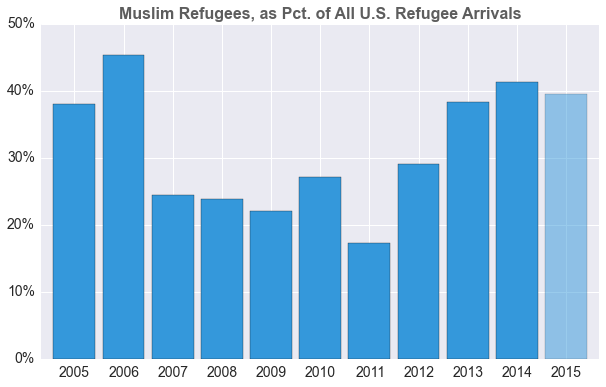

In [17]:
muslim_ratio = muslim_arrivals_by_year / by_religion.groupby("year")["arrivals"].sum()
ax = make_vbar(muslim_ratio, "Muslim Refugees, as Pct. of All U.S. Refugee Arrivals")
ax.set_yticklabels([ "{0:.0f}%".format(y * 100) for y in ax.get_yticks() ])
ax.set_ylim(0, 0.5)
pass

In [18]:
muslim_origins = muslim_arrivals.groupby("origin")["arrivals"].sum()

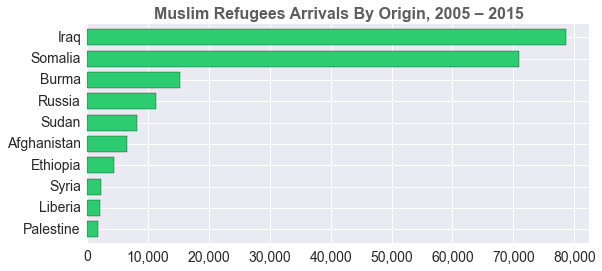

In [19]:
ax = make_hbar(muslim_origins.sort_values(ascending=False).head(10),
    "Muslim Refugees Arrivals By Origin, 2005 – 2015", height=10*20/51)

## Refugees by U.S. destination

In [20]:
large_single_populations = by_destination.groupby([ "origin", "dest_state", "dest_city" ])["arrivals"].sum()\
    .sort_values(ascending=False).head(15)

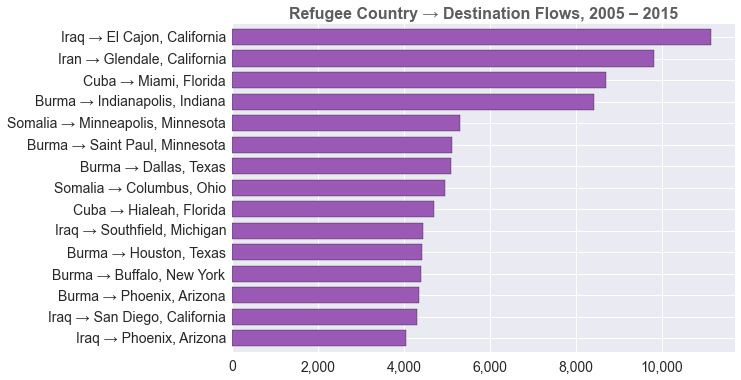

In [21]:
ax = make_hbar(large_single_populations, "Refugee Country → Destination Flows, 2005 – 2015", height=15*20/51)
ax.set_yticklabels([ "{0} → {2}, {1}".format(*y) for y in large_single_populations.index ])
pass

Note: State population data comes from the [Census Bureau's 2014 estimates](http://www.census.gov/popest/data/state/asrh/2014/index.html).

In [22]:
all_by_state = pd.DataFrame({
    "arrivals": by_destination[
        ~by_destination["dest_state"].isin(territories)
    ].groupby("dest_state")["arrivals"].sum(),
}).join(state_populations["pop_est_2014"])
all_by_state["per_1k_residents"] = all_by_state["arrivals"] * 1000.0 / all_by_state["pop_est_2014"]
all_by_state.sort_values("per_1k_residents", ascending=False)

,arrivals,pop_est_2014,per_1k_residents
dest_state,,,
North Dakota,4457,739482,6.027192
Idaho,9527,1634464,5.828822
South Dakota,4703,853175,5.512351
Minnesota,27259,5457173,4.995077
Vermont,3110,626562,4.963595
Arizona,29825,6731484,4.430672
Nebraska,8123,1881503,4.317293
Washington,27009,7061530,3.824809
Utah,10758,2942902,3.655575


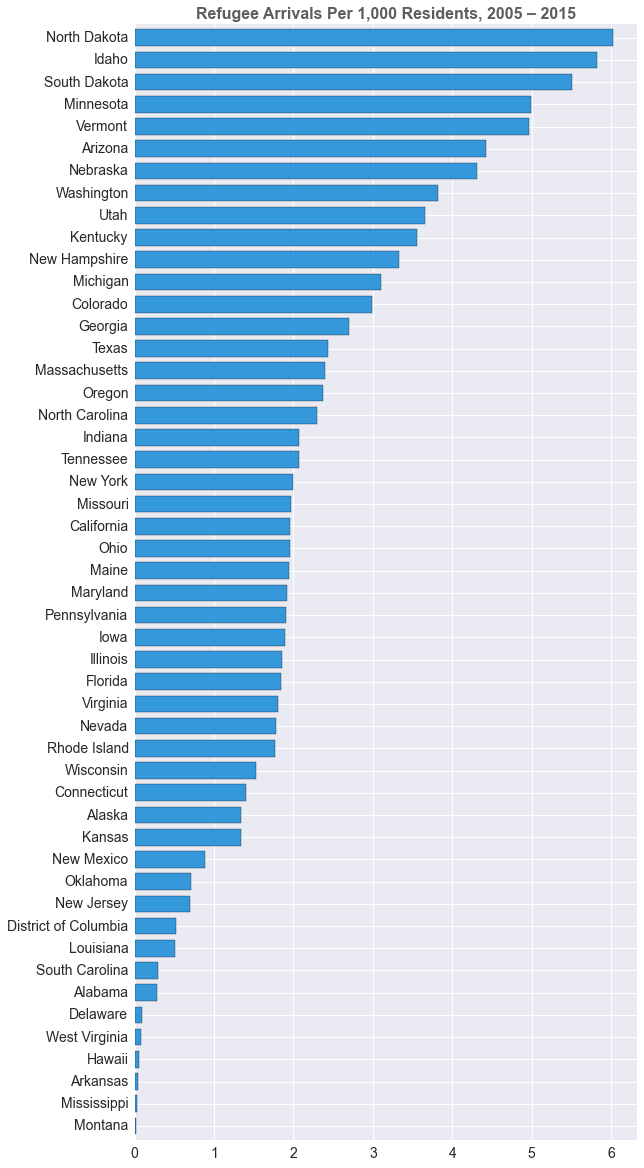

In [23]:
ax = make_hbar(all_by_state["per_1k_residents"].sort_values(ascending=False),
    "Refugee Arrivals Per 1,000 Residents, 2005 – 2015")
pass

---

---

---